# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing and viewing the dataset

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kunwarakash/chennai-housing-sales-price",path="Chennai houseing sale.csv")

100%|██████████| 896k/896k [00:00<00:00, 5.16MB/s]


In [ ]:
data = pd.read_csv(path)
pd.set_option('display.max_columns', None)
data.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


#Cleaning the dataset

checking for the number data points with null entires

we shall replace the null values with corresponding mean values of the particular columns in number of bathrooms and number of bedrooms however we shall drop the entries where QS_OVERALL is missing

In [ ]:
d=data.copy()

d.AREA=d.AREA.str.lower()
d.SALE_COND=d.SALE_COND.str.lower()
d.PARK_FACIL=d.PARK_FACIL.str.lower()
d.BUILDTYPE=d.BUILDTYPE.str.lower()
d.UTILITY_AVAIL=d.UTILITY_AVAIL.str.lower()
d.STREET=d.STREET.str.lower()
d.replace({'AREA':{'velchery':'velachery',
                       'kknagar':'kk nagar',
                       'tnagar':'t nagar',
                       'chormpet':'chrompet',
                       'chrompt':'chrompet',
                       'chrmpet':'chrompet',
                       'ana nagar':'anna nagar',
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam',
                       'adyr':'adyar'},
           'N_BEDROOM':{np.nan:round(d.N_BEDROOM.mean())},'N_BATHROOM':{np.nan:round(d.N_BATHROOM.mean())},
           'SALE_COND':{'ab normal':'abnormal','partiall':'partial','adj land':'adjland','normal sale':'normalsale'},
           'PARK_FACIL':{'no':0,'noo':0,'yes':1},
           'BUILDTYPE':{'comercial':'commercial','others':'other'},
           'UTILITY_AVAIL':{'all pub':'allpub','nosewr ':'nosewr', 'nosewa':'nosewr'},
           'STREET':{'no access':'noaccess','pavd':'paved'}},inplace=True)

d.N_BEDROOM = d.N_BEDROOM.astype(int)
d.N_BATHROOM = d.N_BATHROOM.astype(int)

# Correcting Date columnd from object to daterime format
d.DATE_SALE = pd.to_datetime(d.DATE_SALE, format='%d-%m-%Y')
d.DATE_BUILD = pd.to_datetime(d.DATE_BUILD, format='%d-%m-%Y')

# Creating PROPERTY_AGE column which deternine how old the property id
d['PROPERTY_AGE'] = pd.DatetimeIndex(d.DATE_SALE).year - pd.DatetimeIndex(d.DATE_BUILD).year

# Creating TOTAL_PRICE column by adding 'REG_FEE', 'COMMIS', 'SALES_PRICE' columns
d['TOTAL_PRICE'] = pd.DataFrame(d.REG_FEE	+ d.COMMIS	+ d.SALES_PRICE)

# Rearranging the columns of dframe
d = d.reindex(columns = ['PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE',
       'DATE_BUILD', 'DATE_SALE', 'PROPERTY_AGE',
       'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'REG_FEE', 'COMMIS', 'SALES_PRICE', 'TOTAL_PRICE'])

<ipython-input-7-f5dbd942a87f>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d.replace({'AREA':{'velchery':'velachery',


In [ ]:
d.head(3)

,PRT_ID,AREA,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,DATE_BUILD,DATE_SALE,PROPERTY_AGE,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,TOTAL_PRICE
0,P03210,karapakkam,abnormal,1,commercial,allpub,paved,A,1967-05-15,2011-05-04,44,1004,131,1,1,3,4.0,3.9,4.9,4.330,380000,144400,7600000,8124400
1,P09411,anna nagar,abnormal,0,commercial,allpub,gravel,RH,1995-12-22,2006-12-19,11,1986,26,2,1,5,4.9,4.2,2.5,3.765,760122,304049,21717770,22781941
2,P01812,adyar,abnormal,1,commercial,elo,gravel,RL,1992-02-09,2012-02-04,20,909,70,1,1,3,4.1,3.8,2.2,3.090,421094,92114,13159200,13672408


visualize corelation matrix

<Axes: >

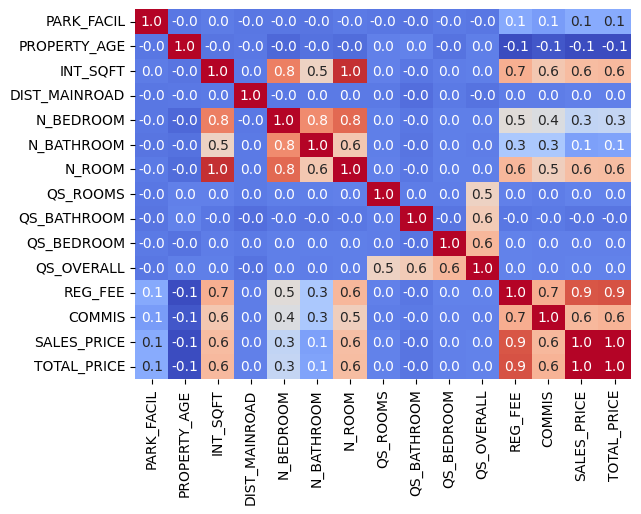

In [ ]:
d1=d[['PARK_FACIL', 'PROPERTY_AGE', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE', 'TOTAL_PRICE']]

sns.heatmap(d1.corr(method='pearson'),cbar=False, annot=True,fmt='.1f', cmap='coolwarm')


interpretation: from the corelation matrix it can be interpreted that the property area and number of rooms primarily contribute to the total priice of the property as expected

we can also observe that there isnt any significant effect on price due to the quality state of the property,
we'll now check if the data is skewered anywhere

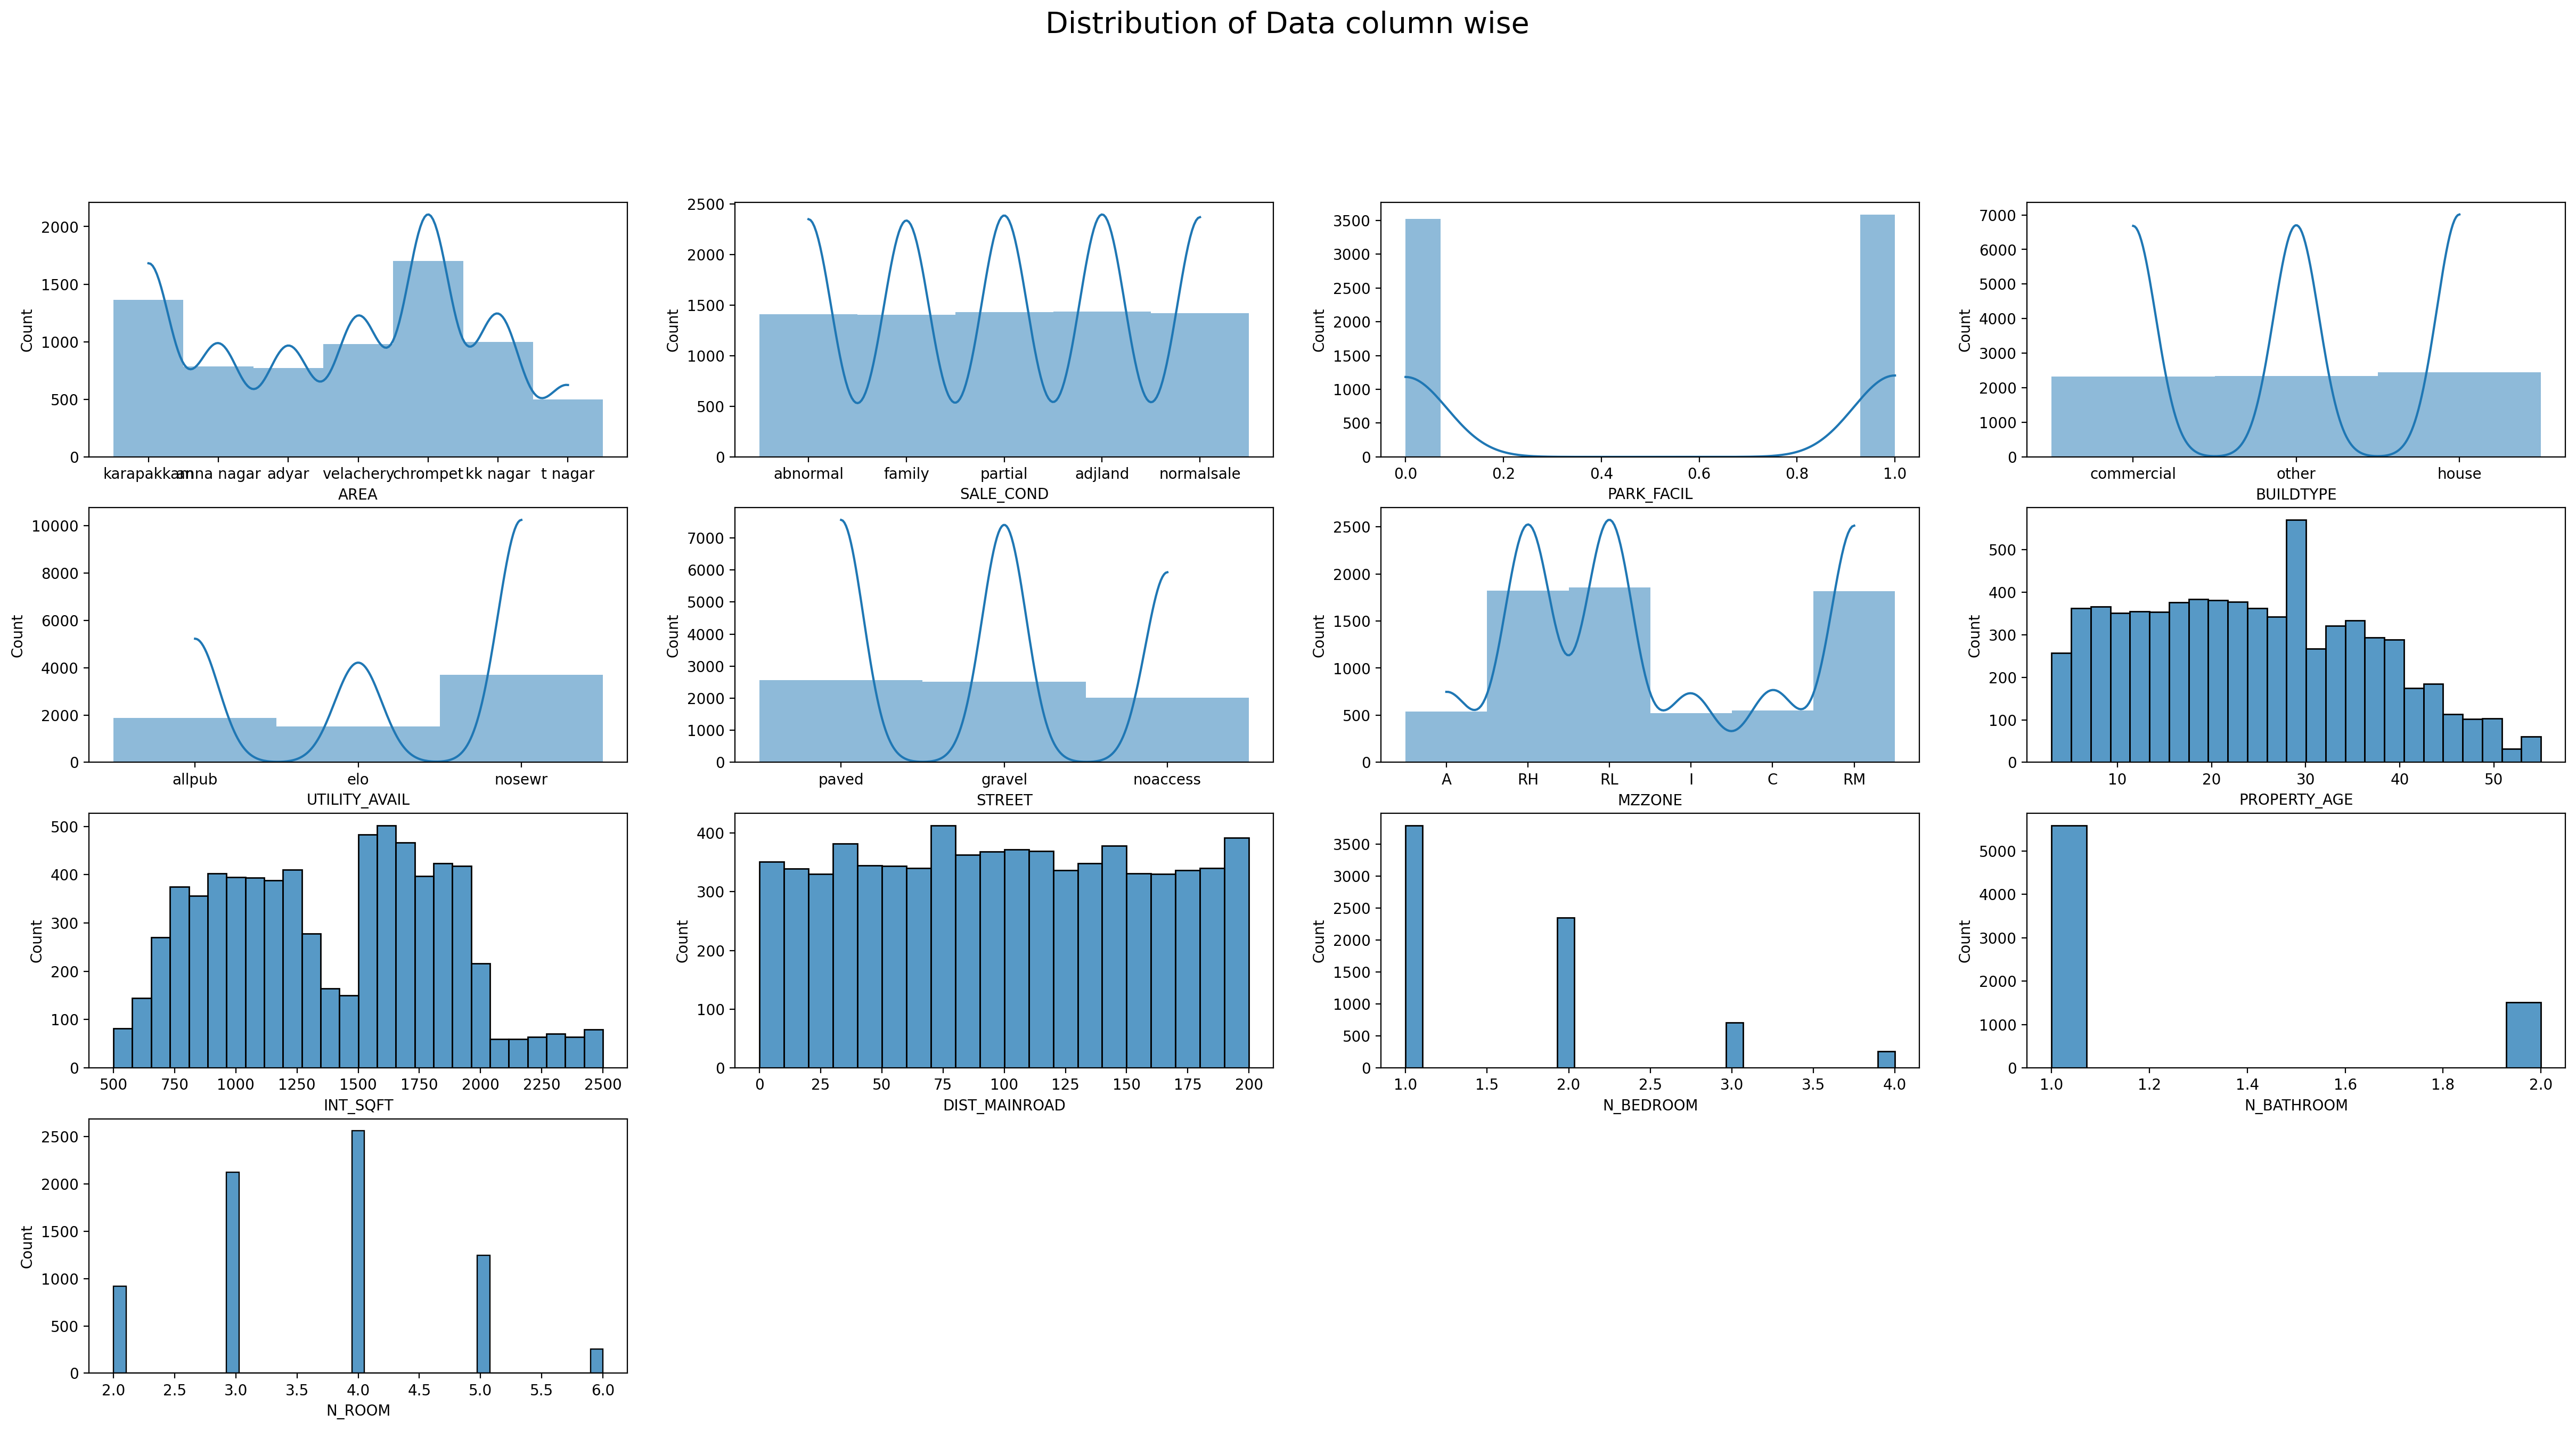

In [ ]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(d.AREA, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(d.SALE_COND, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(d.PARK_FACIL, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(d.BUILDTYPE, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(d.UTILITY_AVAIL, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(d.STREET, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(d.MZZONE, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.histplot(d.PROPERTY_AGE)

plt.subplot(5,4,9)
sns.histplot(d.INT_SQFT)

plt.subplot(5,4,10)
sns.histplot(d.DIST_MAINROAD)

plt.subplot(5,4,11)
sns.histplot(d.N_BEDROOM)

plt.subplot(5,4,12)
sns.histplot(d.N_BATHROOM)

plt.subplot(5,4,13)
sns.histplot(d.N_ROOM)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

hence we observe that the data isnt significantly skewed among the columns, now we shall proceed with encoding the categorical data and removing any redundant columns before training
to determine the type of encoding deployed to each categorical variable we shall visualize their mean sales price values

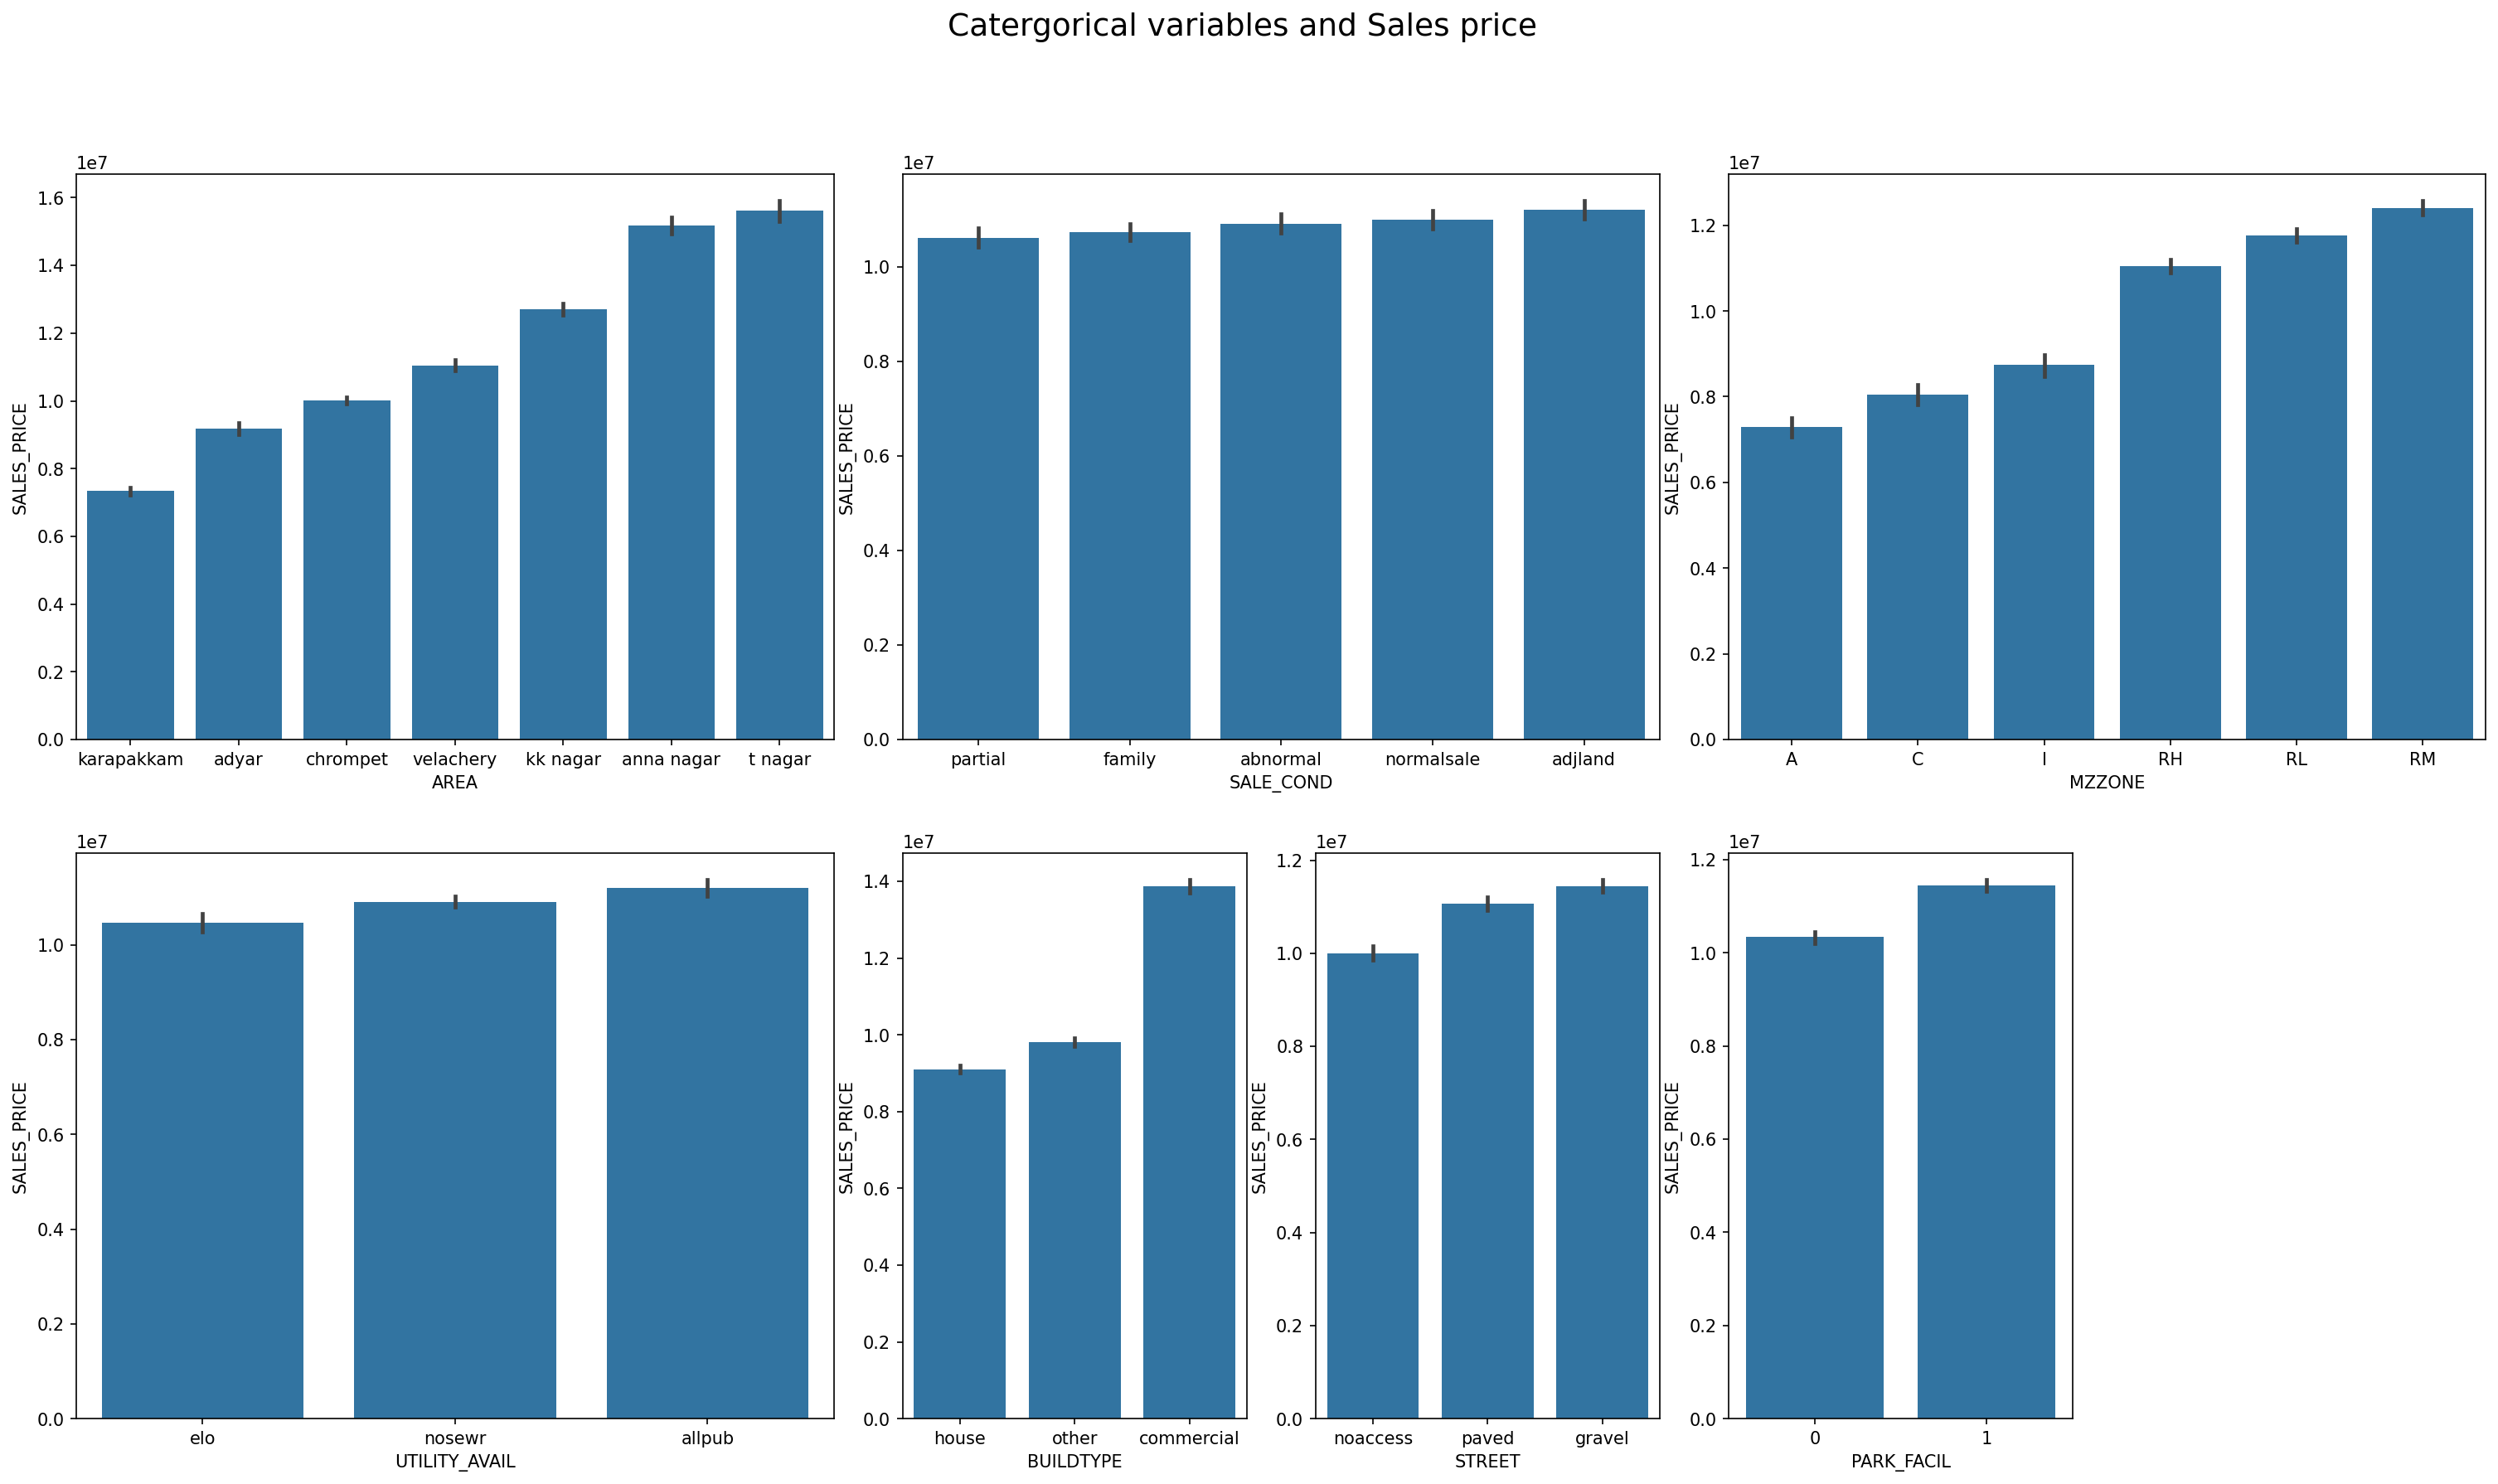

In [ ]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=d.AREA,y=d.SALES_PRICE,order=d.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=d.SALE_COND,y=d.SALES_PRICE,order=d.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=d.MZZONE,y=d.SALES_PRICE,order=d.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=d.UTILITY_AVAIL,y=d.SALES_PRICE,order=d.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=d.BUILDTYPE,y=d.SALES_PRICE,order=d.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=d.STREET,y=d.SALES_PRICE,order=d.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=d.PARK_FACIL,y=d.SALES_PRICE,order=d.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL'])

plt.suptitle("Catergorical variables and Sales price", fontsize=18)
plt.show()


now we shall OneHotEncode the columns with words in their entries

In [ ]:
d1 = d.reindex(columns = [ 'AREA', 'SALE_COND', 'PARK_FACIL',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'PROPERTY_AGE',
       'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM','N_BATHROOM', 'N_ROOM','SALES_PRICE'])
cat_d1 = d1.select_dtypes(exclude=["int", "float"])
for i in cat_d1.columns:
  dum=pd.get_dummies(cat_d1[i])
  d1=pd.concat([d1,dum],axis=1)
  d1.drop(columns=[i],inplace=True)
d1.drop(columns=['karapakkam','abnormal','other','allpub','noaccess','A'],inplace=True)

In [ ]:
d1.head(2)

,PARK_FACIL,PROPERTY_AGE,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALES_PRICE,adyar,anna nagar,chrompet,kk nagar,t nagar,velachery,adjland,family,normalsale,partial,commercial,house,elo,nosewr,gravel,paved,C,I,RH,RL,RM
0,1,44,1004,131,1,1,3,7600000,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
1,0,11,1986,26,2,1,5,21717770,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False


we shall predict sale price in this project as commision is long gone these days and registration price is typically 7% of the sales price

#Predicting prices

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
X,y=d1.drop(columns=['SALES_PRICE']),d1.SALES_PRICE
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
ss=StandardScaler()
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

mm=MinMaxScaler()
X_train_mm=mm.fit_transform(X_train)
X_test_mm=mm.transform(X_test)

linear regressor

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("No scale score",r2_score(y_test,y_pred))

lr.fit(X_train_ss,y_train)
y_pred=lr.predict(X_test_ss)
print("Standard scale score",r2_score(y_test,y_pred))

lr.fit(X_train_mm,y_train)
y_pred=lr.predict(X_test_mm)
print("MinMax scale score",r2_score(y_test,y_pred))

No scale score 0.9556227690741191
Standard scale score 0.9556227690741191
MinMax scale score 0.9556227690741191


KNN regressor

In [ ]:
knnr=KNeighborsRegressor()
knnr.fit(X_train,y_train)
y_pred=knnr.predict(X_test)
print("No scale score",r2_score(y_test,y_pred))

knnr.fit(X_train_ss,y_train)
y_pred=knnr.predict(X_test_ss)
print("Standard scale score",r2_score(y_test,y_pred))

knnr.fit(X_train_mm,y_train)
y_pred=knnr.predict(X_test_mm)
print("MinMax scale score",r2_score(y_test,y_pred))

No scale score 0.2886245405921718
Standard scale score 0.8765322971401583
MinMax scale score 0.870381837567333


Random Forest Regressor

In [ ]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print("No scale score",r2_score(y_test,y_pred))

rfr.fit(X_train_ss,y_train)
y_pred=rfr.predict(X_test_ss)
print("Standard scale score",r2_score(y_test,y_pred))

rfr.fit(X_train_mm,y_train)
y_pred=rfr.predict(X_test_mm)
print("MinMax scale score",r2_score(y_test,y_pred))


No scale score 0.9781492242086678
Standard scale score 0.9781706073082644
MinMax scale score 0.97795675389511


hence random forest regressor under standard scale shows the best results, although there could be a high chance of overfitting, however we shall use a linear regrresor.

In [ ]:
def predict_price(area,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,property_age,int_sqft,n_bedroom,n_bathroom,n_room):
  pd.set_option('future.no_silent_downcasting', True)
  test=pd.DataFrame(columns=X.columns)
  if area in test.columns:
    test.loc[0,area]=1
  if sale_cond in test.columns:
    test.loc[0,sale_cond]=1
  if buildtype in test.columns:
    test.loc[0,buildtype]=1
  if utility_avail in test.columns:
    test.loc[0,utility_avail]=1
  if street in test.columns:
    test.loc[0,street]=1
  if mzzone in test.columns:
    test.loc[0,mzzone]=1
  test.loc[0,'PARK_FACIL']=park_facil
  test.loc[0,'PROPERTY_AGE']=property_age
  test.loc[0,'INT_SQFT']=int_sqft
  test.loc[0,'N_BEDROOM']=n_bedroom
  test.loc[0,'N_BATHROOM']=n_bathroom
  test.loc[0,'N_ROOM']=n_room
  test=test.fillna(0)
  test=ss.transform(test)
  return lr.predict(test)

finally the model and the standard scaler are saved through pickle files which are used later for deployment